In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\bhanu prakash\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tensorflow.keras.utils import image_dataset_from_directory

In [3]:
training_set = image_dataset_from_directory(
    r"C:\Users\bhanu prakash\Downloads\ZhangLabData\CellData\OCT\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.25,
    subset='training',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 108309 files belonging to 4 classes.
Using 81232 files for training.


In [4]:
validation_set = image_dataset_from_directory(
    r"C:\Users\bhanu prakash\Downloads\ZhangLabData\CellData\OCT\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=123,
    validation_split=0.25,
    subset='validation',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 108309 files belonging to 4 classes.
Using 27077 files for validation.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [5]:
INPUT_SHAPE = (224, 224, 3)

In [6]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [7]:
mobnet.trainable = True #--used to freeze weights of this pretrained model 

In [50]:
model = tf.keras.models.Sequential()

In [51]:
from tensorflow.keras import layers

In [52]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape = (224,224,3)))
model.add(layers.MaxPooling2D((2,2)))

In [53]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [54]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(4, activation='softmax'))  # Use 4 for 4 classes

In [55]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │      11,075,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,132,228 (42.47 MB)

 Trainable params: 11,132,228 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
metrics_list = ['accuracy',
                tf.keras.metrics.F1Score()]

In [57]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=metrics_list)

In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 173056)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │      11,075,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,132,228 (42.47 MB)

 Trainable params: 11,132,228 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=1)

2539/2539 ━━━━━━━━━━━━━━━━━━━━ 9525s 4s/step - accuracy: 0.8733 - f1_score: 0.7549 - loss: 0.3758 - val_accuracy: 0.8668 - val_f1_score: 0.7688 - val_loss: 0.4067


In [62]:
training_history.history

{'accuracy': [0.8889723420143127],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.92358947, 0.71191806, 0.5869641 , 0.9419197 ], dtype=float32)>],
 'loss': [0.330639511346817],
 'val_accuracy': [0.8668242692947388],
 'val_f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9115848, 0.724527 , 0.5172244, 0.9218951], dtype=float32)>],
 'val_loss': [0.4066876173019409]}

In [63]:
model.save("Trained_Model.h5")

In [64]:
model.save("Trained_Model.keras")

In [65]:
# Saving history
with open('Training_history.pkl', 'wb') as f:
    pickle.dump(training_history.history, f)

In [66]:
#Reloading History from pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'accuracy': [0.8889723420143127],
 'f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.92358947, 0.71191806, 0.5869641 , 0.9419197 ], dtype=float32)>],
 'loss': [0.330639511346817],
 'val_accuracy': [0.8668242692947388],
 'val_f1_score': [<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.9115848, 0.724527 , 0.5172244, 0.9218951], dtype=float32)>],
 'val_loss': [0.4066876173019409]}

In [70]:
test_set = validation_set = image_dataset_from_directory(
    r"C:\Users\bhanu prakash\Downloads\ZhangLabData\CellData\OCT\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 108309 files belonging to 4 classes.


In [71]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

  92/1693 ━━━━━━━━━━━━━━━━━━━━ 1:22:10 3s/step - accuracy: 0.9119 - f1_score: 0.8493 - loss: 0.2621

KeyboardInterrupt: 

In [51]:
test_loss

0.18832968175411224

In [52]:
test_acc

0.9475946426391602

In [53]:
f1_score

array([0.96402097, 0.9143881 , 0.78808314, 0.9702022 ], dtype=float32)

## Model Evaluation

In [3]:
model = tf.keras.models.load_model("Trained_Model.h5")

2024-11-02 10:47:59.283337: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-11-02 10:47:59.283412: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-02 10:47:59.283424: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-02 10:47:59.283503: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-02 10:47:59.283731: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Function  (None, 1000)              5507432   
 al)                                                             
                                                                 
 dense (Dense)               (None, 4)                 4004      
                                                                 
Total params: 5511436 (21.02 MB)
Trainable params: 5487036 (20.93 MB)
Non-trainable params: 24400 (95.31 KB)
_________________________________________________________________


In [5]:
test_set = validation_set = image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10934 files belonging to 4 classes.


In [6]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [7]:
Y_true

<tf.Tensor: shape=(10934,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [8]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
Y_pred = tf.argmax(predicted_categories, axis=1)

2024-11-02 10:48:14.359978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


171/171 [==============================] - 31s 175ms/step


In [9]:
Y_true

<tf.Tensor: shape=(10934,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [10]:
Y_pred

<tf.Tensor: shape=(10934,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

### 1. Classification Report

In [11]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3746
           1       0.95      0.88      0.91      1161
           2       0.79      0.79      0.79       888
           3       0.96      0.99      0.97      5139

    accuracy                           0.95     10934
   macro avg       0.92      0.90      0.91     10934
weighted avg       0.95      0.95      0.95     10934



### 2. Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[3577,   23,  122,   24],
       [  19, 1020,   13,  109],
       [  75,   10,  701,  102],
       [   4,   17,   55, 5063]])

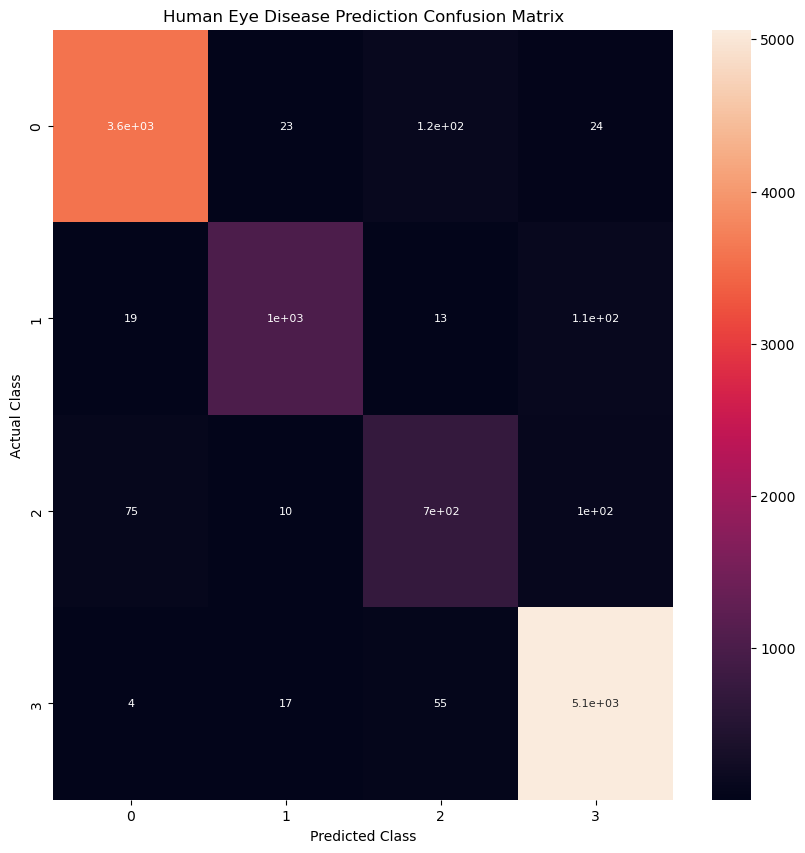

In [18]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Human Eye Disease Prediction Confusion Matrix",fontsize=12)
plt.show()